# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:50px;padding:20px 10px;font-weight:bold">NYC Airbnb Data <p/> 

### The data can be found here: [InsideAirbnb](http://insideairbnb.com/get-the-data/)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [37]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')

In [38]:
listings.to_parquet('listings.parquet', engine='fastparquet')

In [3]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/86745...,https://a0.muscache.com/im/pictures/user/86745...,Gravesend,9.0,12.0,"['email', 'phone']",t,t,"Brooklyn , New York, United States",Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",$299.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,2022-09-07,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.0,4.75,4.88,NaN,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, NY",A New Yorker since (Phone number hidden by Air...,within a day,75%,23%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,9.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",$175.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,2022-09-07,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,NaN,f,3,3,0,0,0.31


In [4]:
columns_to_use = ['id',
                  'host_since',
                  'host_response_time',
                  'host_response_rate',
                  'host_acceptance_rate',
                  'host_total_listings_count',
                  'host_is_superhost',
                  'neighbourhood_group_cleansed',
                  'latitude',
                  'longitude',
                  'room_type',
                  'accommodates',
                  'bathrooms_text',
                  'bedrooms',
                  'beds',
                  'amenities',
                  'number_of_reviews',
                  'review_scores_rating',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value',
                  'instant_bookable',
                  'price']

In [5]:
df = listings[columns_to_use]
df.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price
0,2539,2008-09-07,within an hour,100%,90%,12.0,f,Brooklyn,40.64529,-73.97238,Private room,2,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",9,4.89,4.88,5.00,5.00,5.00,4.75,4.88,f,$299.00
1,2595,2008-09-09,within a day,75%,23%,9.0,f,Manhattan,40.75356,-73.98559,Entire home/apt,1,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",49,4.68,4.73,4.63,4.77,4.80,4.81,4.40,f,$175.00
2,5121,2009-02-03,within an hour,100%,100%,2.0,t,Brooklyn,40.68535,-73.95512,Private room,2,NaN,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",50,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,$60.00
3,45910,2010-08-17,within an hour,100%,19%,7.0,f,Queens,40.70309,-73.89963,Entire home/apt,16,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",13,4.42,4.64,4.36,4.82,5.00,4.82,4.55,f,$425.00
4,5136,2009-02-03,NaN,NaN,33%,5.0,f,Brooklyn,40.66265,-73.99454,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,f,$275.00


In [6]:
df.shape

(39881, 26)

In [7]:
df.isna().sum()

id                                  0
host_since                         50
host_response_time              13548
host_response_rate              13548
host_acceptance_rate            11861
host_total_listings_count          50
host_is_superhost                  29
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms_text                     84
bedrooms                         3783
beds                              884
amenities                           0
number_of_reviews                   0
review_scores_rating             8362
review_scores_accuracy           8825
review_scores_cleanliness        8815
review_scores_checkin            8829
review_scores_communication      8820
review_scores_location           8832
review_scores_value              8832
instant_bookable                    0
price                               0
dtype: int64

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Cleaning the Data <p/> 

## Columns to be cleaned:
* host_since
* host_response_rate
* host_acceptance_rate
* host_is_superhost
* bathrooms_text
* instant_bookable
* Price

In [8]:
# We will only work with columns that have no missing data

df = df.dropna().reset_index(drop=True)

### Host Columns

In [9]:
# Change to datetime format and extract just the year
df['host_since'] = pd.to_datetime(df['host_since']).dt.year

# Remove the % symbol in rate columns
df['host_response_rate'] = df['host_response_rate'].str.replace('%',"").astype(int)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%',"").astype(int)

# Recode superhost column to binary
df['host_is_superhost'] = df['host_is_superhost'].replace({'f':0,'t':1}).astype(int)

### Bathrooms

In [10]:
df['bathrooms_text'].value_counts()

1 bath               9245
1 shared bath        4743
1 private bath       1494
2 baths              1404
2 shared baths        564
1.5 baths             527
1.5 shared baths      392
2.5 baths             214
3 baths               129
0 shared baths         60
3.5 baths              58
3 shared baths         54
2.5 shared baths       47
4 baths                37
4.5 baths              13
0 baths                12
Shared half-bath       11
Half-bath               8
Private half-bath       7
4 shared baths          6
5.5 baths               4
6.5 baths               2
6 shared baths          2
6 baths                 2
5 baths                 1
7 baths                 1
Name: bathrooms_text, dtype: int64

In [11]:
# Create a boolean column for if the bathroom is shared
df['shared_bath'] = df['bathrooms_text'].str.contains('shared').astype(int)  

# Extract just the number of bathrooms from the string
bath = df['bathrooms_text'].str.split(' ', n=1, expand=True)[0]

# Replace 'Shared half-bath','Half-bath', and 'Private half-bath' with 0.5 
bath = bath.replace('Shared',0.5).replace('Half-bath',0.5).replace('Private',0.5)

# Create bath column
df['bath'] = bath

# Change to float
df['bath'] = df['bath'].astype(float)

# Update data to only inclue more than 0 bathrooms
df = df.query('bath > 0')

# Drop bathrooms_text column
df = df.drop('bathrooms_text',axis=1)

### Instant Bookable

In [12]:
# Recode column to binary
df['instant_bookable'] = df['instant_bookable'].replace({'f':0,'t':1}).astype(int)

### Price

In [13]:
# Remove '$' and ',' and convert to float
df['price'] = df['price'].str.replace('$','').str.replace(',', '').astype(float)

### Amenities

In [14]:
df['amenities'].head()

0    ["First aid kit", "Microwave", "Stove", "Coffe...
1    ["Hair dryer", "Essentials", "Carbon monoxide ...
2    ["First aid kit", "Coffee maker", "Gym", "Long...
3    ["Body soap", "Microwave", "Laundromat nearby"...
4    ["Essentials", "Oven", "Cable TV", "Refrigerat...
Name: amenities, dtype: object

In [15]:
amenities = df["amenities"].apply(eval)


# Count the amenities
amenities_dict = {}
for i in amenities:
    for j in i:
        if j not in amenities_dict:
            amenities_dict[j] = 1
        else:
            amenities_dict[j] += 1
            

# Save as a series and take the top 30
amenities_series = pd.Series(amenities_dict).sort_values(ascending=False).head(30)

# Save the indeces as a list
amenities_list = amenities_series.index

# Make a copy of df
df_new = df.copy()

# Make a boolean column for each amenitity
for x in amenities_list:
    df_new[x] = df['amenities'].str.contains(x).astype(int)
    
df_new = df_new.drop('amenities',axis=1)

In [16]:
pd.set_option('display.max_rows', 1000)
pd.Series(amenities_dict).sort_values(ascending=False).head(300)

Smoke alarm                                                                                           17837
Wifi                                                                                                  17217
Essentials                                                                                            16819
Kitchen                                                                                               16658
Long term stays allowed                                                                               16466
Carbon monoxide alarm                                                                                 16162
Hangers                                                                                               15539
Hot water                                                                                             15278
Dishes and silverware                                                                                 14399
Hair dryer                  

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Visualizing the Data <p/> 

## Boroughs

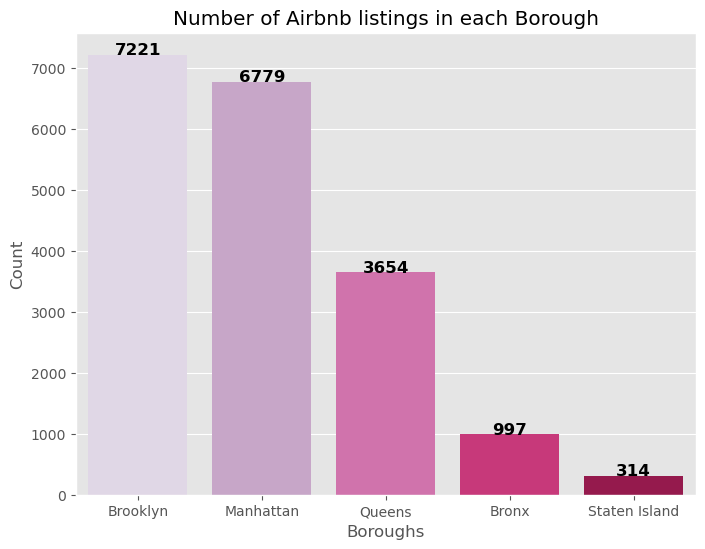

In [17]:
# Countplot for the number of listings in each borough

plt.figure(figsize=(8,6))
ax = sns.countplot(x='neighbourhood_group_cleansed',
                   data=df_new,
                   order =['Brooklyn','Manhattan','Queens','Bronx','Staten Island'],
                   palette='PuRd')

ax.set_ylabel('Count')
ax.set_xlabel('Boroughs')
ax.set_title('Number of Airbnb listings in each Borough')
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.4, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='large') 
                
plt.show()

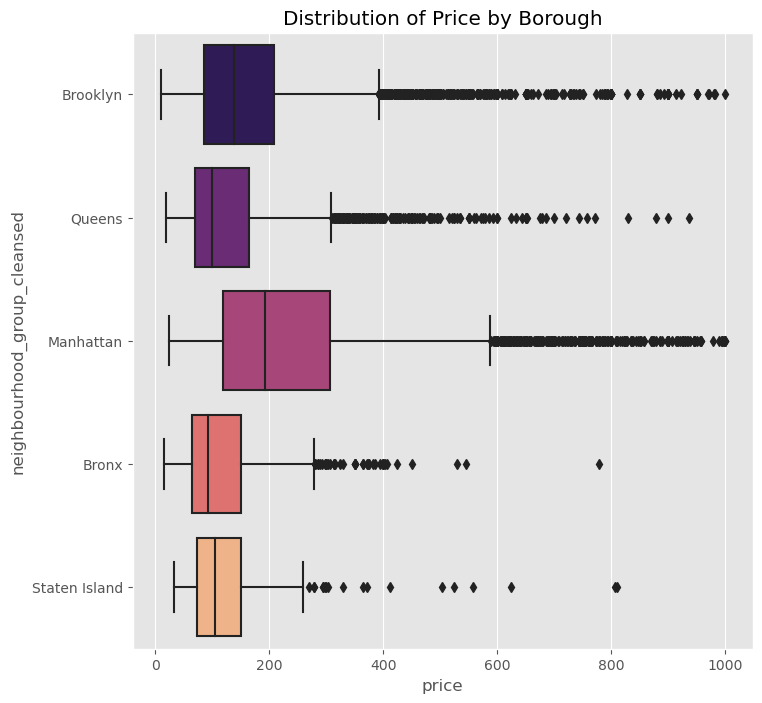

In [18]:
# Boxplot to show distribution of price for each borough
# There are A LOT of outliers, so we will look at price < 1000
plt.figure(figsize=(8,8))
ax = sns.boxplot(y='neighbourhood_group_cleansed',
                 x='price',
                 data=df_new.query('price < 1000'),
                 palette='magma')


ax.set_title('Distribution of Price by Borough')
                
plt.show()

## Room Type

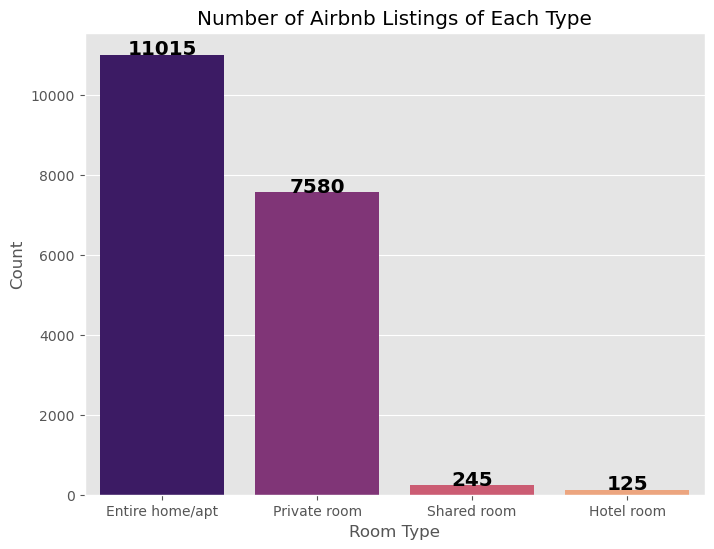

In [19]:
# Countplot for number of listings of each room type

plt.figure(figsize=(8,6))
ax = sns.countplot(x='room_type',
                   data=df_new,
                   palette='magma',
                   order = ['Entire home/apt','Private room', 'Shared room', 'Hotel room'])

ax.set_ylabel('Count')
ax.set_xlabel('Room Type')
ax.set_title('Number of Airbnb Listings of Each Type')
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.4, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='x-large') 
                
plt.show()

In [20]:
df_new['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

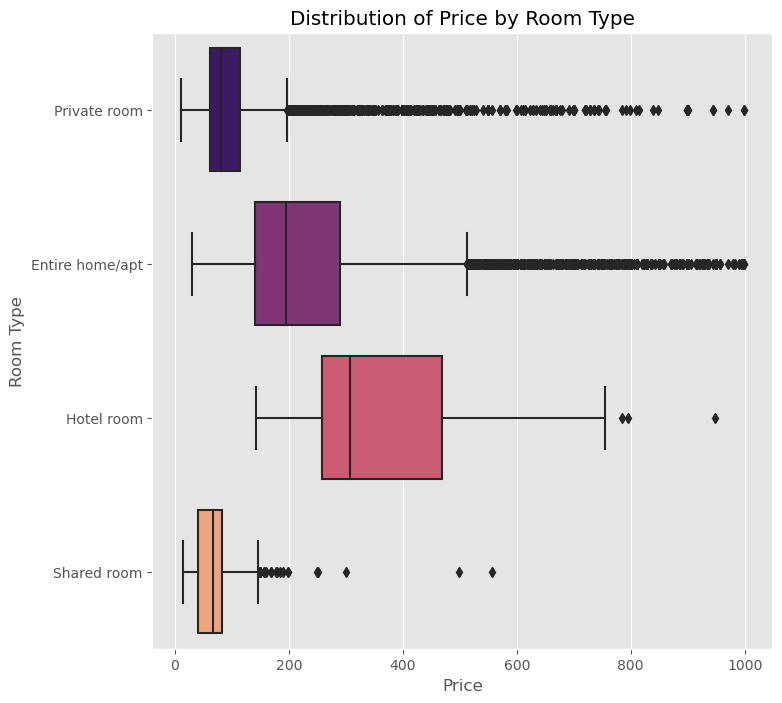

In [21]:
# Boxplot to show distribution of price for each room type
# There are A LOT of outliers, so we will look at price < 1000

plt.figure(figsize=(8,8))
ax = sns.boxplot(y='room_type',
                 x='price',
                 data=df_new.query('price < 1000'),
                 palette='magma')

ax.set_ylabel('Room Type')
ax.set_xlabel('Price')
ax.set_title('Distribution of Price by Room Type')
                
plt.show()

## Accommodates

In [22]:
df_new[['price','neighbourhood_group_cleansed','room_type','accommodates','bath','beds']].head()

,price,neighbourhood_group_cleansed,room_type,accommodates,bath,beds
0,299.0,Brooklyn,Private room,2,1.0,1.0
1,425.0,Queens,Entire home/apt,16,2.5,10.0
2,308.0,Brooklyn,Hotel room,2,1.0,1.0
3,68.0,Manhattan,Private room,2,1.0,1.0
4,55.0,Manhattan,Private room,2,1.5,2.0


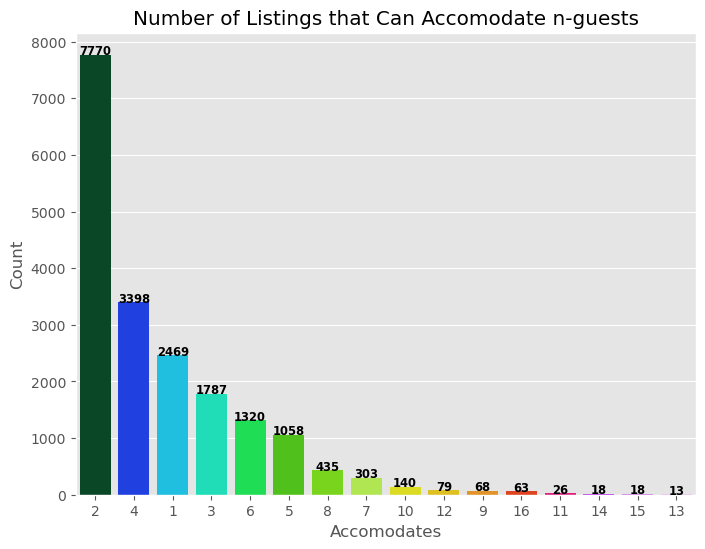

In [23]:
# Countplot for number of people that can be accommodated

plt.figure(figsize=(8,6))
ax = sns.countplot(x='accommodates',
                   data=df_new,
                   palette='gist_ncar',
                   order = [2,4,1,3,6,5,8,7,10,12,9,16,11,14,15,13]
                   )

ax.set_ylabel('Count')
ax.set_xlabel('Accomodates')
ax.set_title('Number of Listings that Can Accomodate n-guests')
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.4, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='small') 
                
plt.show()

## Relationship between Price and Beds/Bath 

<Figure size 800x600 with 0 Axes>

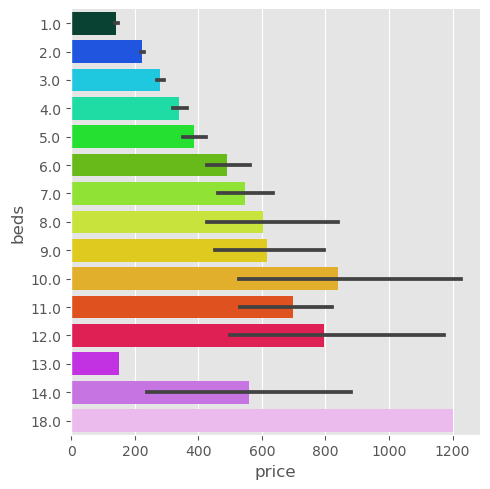

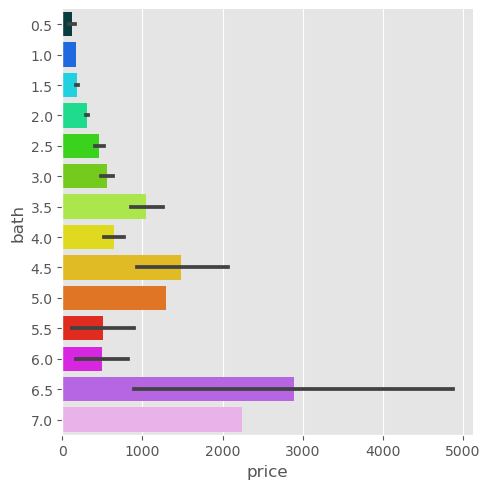

In [25]:
plt.figure(figsize=(8,6))

ax1 = sns.catplot(x='price',
                 y='beds',
                 data=df_new,
                 kind = 'bar',
                 orient = 'h',
                 palette='gist_ncar')


ax2 = sns.catplot(x='price',
                 y='bath',
                 data=df_new,
                 kind = 'bar',
                 orient = 'h',
                 palette='gist_ncar')

plt.show()

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Predicting Price <p/> 

In [26]:
# Get dummy variables for cat features
host_response = pd.get_dummies(df_new['host_response_time'],drop_first=True)
borough = pd.get_dummies(df_new['neighbourhood_group_cleansed'],drop_first=True)
room_type = pd.get_dummies(df_new['room_type'],drop_first=True)

df_final = pd.concat([df_new, host_response,borough,room_type],axis=1)
df_final = df_final.drop(['host_response_time','neighbourhood_group_cleansed','room_type','id'],axis =1)

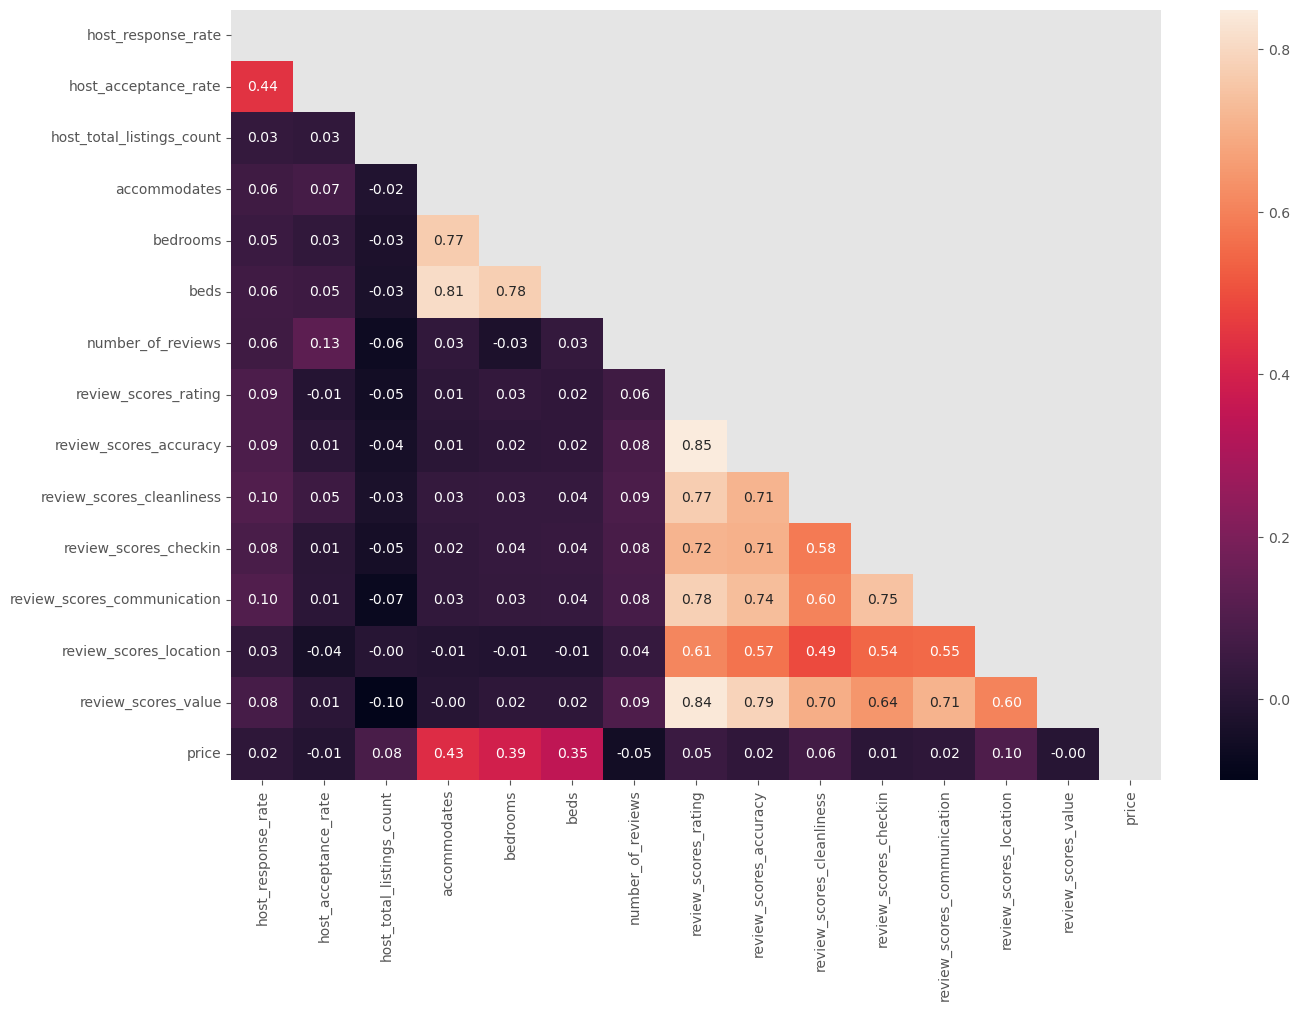

In [27]:
num_features = ['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates','bedrooms',
                'beds','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
               'price']

corr = df_final[num_features].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [15,10]
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV



In [29]:
# Let's get rid of our outliers by limiting or price to be less than 1000
df_final = df_final.query('price < 1000.0')

# Create our feature and target variables
X = df_final.drop('price',axis=1)
y = df_final['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

## Random Forest

In [30]:
rf = RandomForestRegressor(n_estimators=1000,
                           criterion='mse',
                           n_jobs = -1,
                           random_state=42)
rf.fit(X_train, y_train)

y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)
print(' RF Accuracies')
print('RMSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_preds)**(1/2), mean_squared_error(y_test, y_test_preds)**(1/2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))
print('-----------------------------------------------------')

 RF Accuracies
RMSE train: 29.161, test: 84.829
R^2 train: 0.957, test: 0.670
-----------------------------------------------------


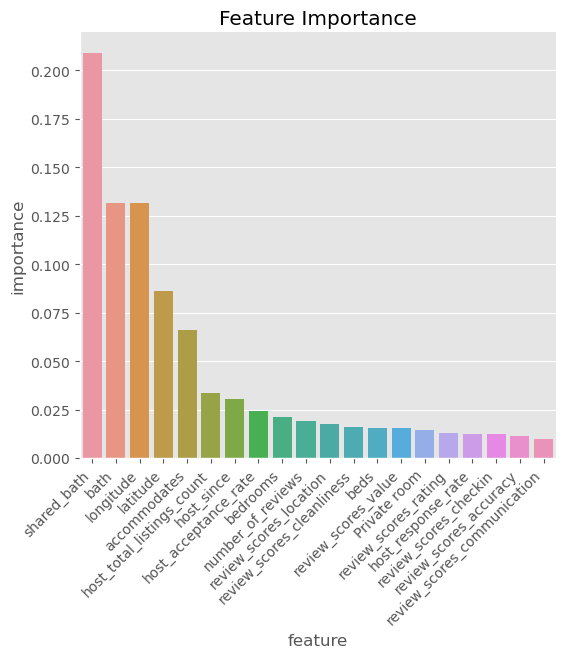

In [31]:
importantances = rf.feature_importances_
feat_names = X.columns
results = pd.DataFrame({'feature':feat_names, 'importance':importantances})
results_sort = results.sort_values(by='importance', ascending=False)[:20]


ax = sns.catplot(x='feature',
                 y='importance',
                 kind='bar',
                 data=results_sort,
                 height=5, aspect=8/6)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Feature Importance')
plt.show()

In [ ]:
# If we want to use a reduced number of features:

#imp_feat = results_sort.head(20)['feature'].to_list()
#X = X[imp_feat]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGboost

In [32]:
xgb = XGBRegressor(objective ='reg:squarederror',
                    colsample_bytree = 0.4,
                    learning_rate = 0.05,
                    max_depth = 5,
                    alpha = 10,
                    gamma = 0,
                    min_child_weight = 7,
                    n_estimators = 1200)


xgb.fit(X_train,y_train)


xgb_y_train_preds = xgb.predict(X_train)
xgb_y_test_preds = xgb.predict(X_test)
print(' XGB Accuracies')
print('RMSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, xgb_y_train_preds)**(1/2), mean_squared_error(y_test, xgb_y_test_preds)**(1/2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, xgb_y_train_preds),r2_score(y_test, xgb_y_test_preds)))
print('-----------------------------------------------------')

 XGB Accuracies
RMSE train: 48.320, test: 80.802
R^2 train: 0.881, test: 0.700
-----------------------------------------------------


In [33]:
score = cross_val_score(xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

#train_score = cross_val_score(xgb, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

#test_score = cross_val_score(xgb, X_test, y_test, cv=10, scoring='neg_mean_absolute_error')

In [34]:
print('Cross Val MSE Test: ',(-score.mean())**(1/2))

Cross Val MSE Test:  88.00192347715016


In [ ]:
#params = {
# 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
# 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
# 'min_child_weight' : [ 1, 3, 5, 7 ],
# 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
# 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}
#
#rs_model=RandomizedSearchCV(xgb,
#                            param_distributions=params,
#                            n_iter=5,
#                            scoring='neg_mean_squared_error',
#                            n_jobs=-1,
#                            cv=5,
#                            verbose=3)
#
#rs_model.fit(X_train,y_train)
#
#print("Best parameters:", rs_model.best_params_)
#print("Lowest RMSE: ", (-rs_model.best_score_)**(1/2))

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Results <p/> 

The Random Forest model is overfitting the training data with a RMSE of 29.2 and 84.8 on the test set we. The XGBoost model is overfitting as well, but it is less severe. We are geting a RMSE of 48.8 on the training set and 80.8 on the test set.

Ideas for improving the model:
1. More hyperparameter tuning
2. Deeping feature engineering
    * Combine review score attributes
    * Analyze the attributes more closely
3. Try other models (SVM, NN, etc.)